<a href="https://colab.research.google.com/github/ShrewdVan/ME_314/blob/main/HW0_ME314.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME314 Homework 0






In [ ]:
#IMPORT ALL NECESSARY PACKAGES AT THE TOP OF THE CODE
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sympy import sin, cos, pi

In [ ]:

def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

In [ ]:
x = sym.symbols('x')
Eqn = sym.Eq(4,(300/x)**(1.4/0.4))
display(Eqn)
Sol = sym.solve(Eqn,x)
display(Sol)

                        3.5
                     ⎛1⎞   
4 = 467653718.043596⋅⎜─⎟   
                     ⎝x⎠   

[201.885028894853, -44.9236451814803 - 196.823349721226⋅ⅈ, -44.9236451814803 +
 196.823349721226⋅ⅈ]

## Problem 1 (20pts)

Given a function $f(x)=\sin(x)$, find the derivative of $f(x)$ and find the directional derivative of $f(x)$ in the direction $v$.  Moreover, compute these derivatives using Pythons's SymPy package.

In [ ]:

x = sym.symbols('x')
f = sin(x)

# Part 1: compute derivative of f wrt x
df = f.diff(x)

print("derivative of f wrt x: ")
display(Markdown('**{}**'.format(df)))

# Part 2: compute directional derivative of f
eps, v = sym.symbols(r'\epsilon, v')
new_f = sin(x + v*eps)
df_eps = new_f.diff(eps)
df_eps.simplify()
print("derivative of f wrt eps: ")
display(df_eps)

# evaluate the directional derivative by assuming eps = 0
new_df = df_eps.subs(eps, 0)
new_df.simplify()
print("directional derivative of f on v:")
display(Markdown("**{}**".format(new_df)))

derivative of f wrt x: 


**cos(x)**

derivative of f wrt eps: 


v⋅cos(\epsilon⋅v + x)

directional derivative of f on v:


**v*cos(x)**

## Problem 2 (20pts)

Given a function of trajectory:
$$
J(x(t)) = \int_0^{\pi/2} \frac{1}{2} x(t)^2 dt
$$
Compute the analytical solution when $x=\cos(t)$, verify your answer by numerical integration.

The code for numerical integration is provided below:

In [ ]:

def integrate(func, xspan, step_size):
    x = np.arange(xspan[0], xspan[1], step_size)
    int_val = 0
    for xi in x:
        int_val += func(xi) * step_size
    return int_val

# Quote the function here with the x(t)= cos(t)
def p3(t):
    return 0.5 * (cos(t)) ** 2

# Decrease the step size gradually to see how the outcome changes
print( integrate(func=p3, xspan=[0, pi/2], step_size=0.01) )
print( integrate(func=p3, xspan=[0, pi/2], step_size=0.001) )
print( integrate(func=p3, xspan=[0, pi/2], step_size=0.0005) )

0.395199076563803
0.392949081706737
0.392824081699208


In [ ]:
# The result got by handwritten calculation is pi/8, which is roundly 0.39269. We can see there is tiny differenve between these two method. The source of error is the approximation
# we use here. As we decrease the step size, the outcome is approaching the answer we got from handwrittern verison.

## Problem 3 (20pts)

For the function $J(x(t))$ in Problem 2, compute and evaluate the analytical solution for the directional derivative of $J$ at $x(t) = \cos(t)$ in the direction $v(t) = \sin(t)$. Note that the directional derivative should be in the form of integration. Evaluate this integral analytically, and verify your answer using the same numerical integration function as in Problem 2.

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written (or you can use $\LaTeX$) derivation and evaluation of the directional derivative. Also, include the code used to numerically verify the integration result.**

In [ ]:

def p4(t):
  return cos(t)*sin(t)

print( integrate(func=p4, xspan=[0, pi/2], step_size=0.01) )
print( integrate(func=p4, xspan=[0, pi/2], step_size=0.001) )
print( integrate(func=p4, xspan=[0, pi/2], step_size=0.0005) )



0.499986997796966
0.499999914428558
0.499999988510288


In [ ]:
# Almost the same with the problem 2, as the step size decreasing, the outcome is approaching the 0.5, which is the answer got from the handwrittern calculation.

## Problem 4 (20pts)

Verify your answer in Problem 3 symbolically using Python's SymPy package, this means you need to compute the directional derivative and evaluate the integration all symbolically.

*Hint 1: Different from computing directional derivative in Problem 1, this time the function includes integration. Thus, instead of defining x as a symbol, you should define x as a function of symbol t. An example of defining function and taking the derivative of the function integration is provided below.*

In [ ]:
t = sym.symbols('t')
# define function x and y
x = sym.Function('x')(t)
v = sym.Function('v')(t)
eps = sym.symbols(r'\epsilon')
# define J(x(t), y(t):
J = sym.integrate(0.5*(x + eps*v)**2, [t, 0, sym.pi/2])
print('J(x(t), y(t)) = ')
display(J)

# take the time derivative of J(x(t))
dJdx = J.diff(eps)
print('derivative of J(x(t), y(t)) wrt x(t): ')
display(dJdx)

# now, we have x(t)=sin(t) and y(t)=cos(t), we substitute them
# in, and evaluate the integration
dJdx_subs = dJdx.subs({x:sym.cos(t), v:sym.sin(t),eps: 0})
print('derivative of J, after substitution: ')
display(dJdx_subs)
print('evaluation of derivative of J, after substitution: ')
display(Markdown("**{}**".format(sym.N(dJdx_subs))))

J(x(t), y(t)) = 


    π                                                          π         
    ─                          π                               ─         
    2                          ─                               2         
    ⌠                          2                               ⌠         
    ⎮         2  2             ⌠                               ⎮  2      
0.5⋅⎮ \epsilon ⋅v (t) dt + 0.5⋅⎮ 2⋅\epsilon⋅v(t)⋅x(t) dt + 0.5⋅⎮ x (t) dt
    ⌡                          ⌡                               ⌡         
    0                          0                               0         

derivative of J(x(t), y(t)) wrt x(t): 


    π                                           
    ─                           π               
    2                           ─               
    ⌠                           2               
    ⎮             2             ⌠               
0.5⋅⎮ 2⋅\epsilon⋅v (t) dt + 0.5⋅⎮ 2⋅v(t)⋅x(t) dt
    ⌡                           ⌡               
    0                           0               

derivative of J, after substitution: 


    π            π                   
    ─            ─                   
    2            2                   
    ⌠            ⌠                   
0.5⋅⎮ 0 dt + 0.5⋅⎮ 2⋅sin(t)⋅cos(t) dt
    ⌡            ⌡                   
    0            0                   

evaluation of derivative of J, after substitution: 


**0.500000000000000**

## Problem 5 (20pts)

Given the equation:
$$
xy + \sin(x) = x + y
$$
Use Python's SymPy package to symbolically solve this equation for $y$, thus you can write $y$ as a function of $x$. Transfer your symbolic solution into a numerical function and plot this function for $x\in[0, \pi]$ with Python's Matplotlib package.

In this problem you will use two methods in SymPy. The first is its symbolic sovler method **solve()**, which takes in an equation or expression (in this it equals 0) and solve it for one or one set of variables. Another method you will use is **lambdify()**, which can transfer a symbolic expression into a numerical function automatically (of course in this problem we can hand code the function, but later in the class we will have super sophisticated expression to evaluate.


Original equation


x⋅y + sin(x) = x + y

Symbolic solutions
[(x - sin(x))/(x - 1)]
Test: func(1.0) =  inf


<lambdifygenerated-5>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return (x - sin(x))/(x - 1)


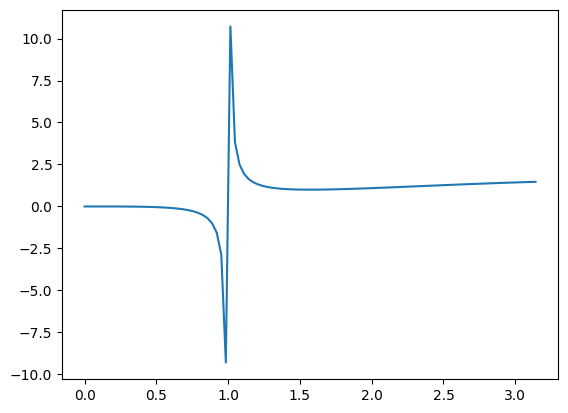

In [ ]:

x, y = sym.symbols(r'x,y')
eqn = sym.Eq(x*y+sin(x), x+y)
print('Original equation')
eqn.simplify()
display(eqn)

# solve this equation for y
y_sol = sym.solve(eqn, y)
print('Symbolic solutions')
print(y_sol)
y_expr = y_sol[0]

# lambdify the expression wrt symbol x
func = sym.lambdify(x, y_expr)
print('Test: func(1.0) = ', func(1.0))


x_list = np.linspace(0, np.pi, 100)
f_list = func(x_list)

# plot it
plt.plot(x_list, f_list)
plt.show()

**Turn in: A copy of the code used to solve for symbolic solution and evaluate it as a numerical function. Also, include the plot of the numerical function.**